In [8]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

# functions needed to work with images
# code below sourced from: https://gist.github.com/daviddalpiaz/ae62ae5ccd0bada4b9acd6dbc9008706
# helper function for visualization
show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0  # avoid dark pixel in top left
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

In [5]:
raw_data <- read_csv("data/datasource.csv",col_names = c("label",seq(from=1,to=784,by=1)),skip=1)
head(raw_data)

Rows: 11176 Columns: 785
── Column specification ──────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (785): label, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
raw_data <- raw_data|>
    mutate(label=as.factor(label))

head(raw_data)

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


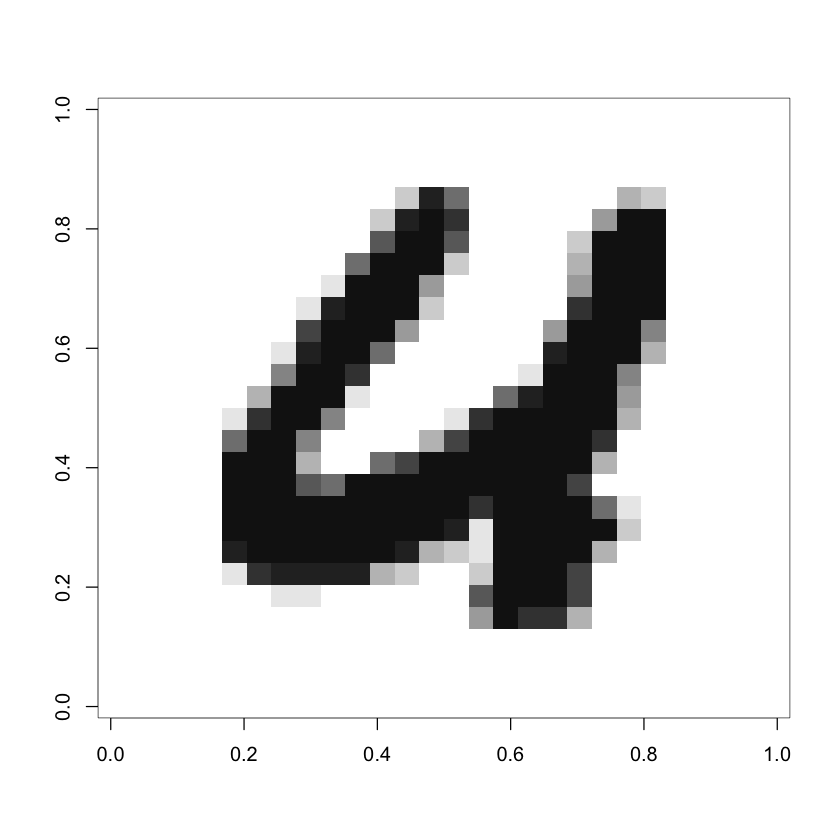

In [14]:
show_digit(slice(select(raw_data, -label), 10001))

In [13]:
slice(raw_data, 10001)

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
